### Polynomial degree features

- A non-linear function can be fit by extending `Linear Regression` with Polynomial features. The technique is known as `Polynomial Regression`
- For `n` features, applying polynomial degree `d` makes `(n+d)! / n! * d!` features (possible feature explosion for higher degrees!)
- For `d=2`, `x` and `x*x` would be included as features. However, for `d=3`, with features `x1` and `x2` - their 3rd degree powers as well as the combinations yielding 3rd degree would be included.

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
m = 100

X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.rand(m,1)

In [3]:
polynomial_features = PolynomialFeatures(degree=2, include_bias=False)

X_polynomial = polynomial_features.fit_transform(X)

print("X:{} and X_polynomial: {}".format(X[0], X_polynomial[0]))

X:[1.95021829] and X_polynomial: [1.95021829 3.8033514 ]


In [4]:
linear_regression = LinearRegression()

linear_regression.fit(X_polynomial, y)
print("Intercept:{} and Coefficient: {}".format(linear_regression.intercept_, linear_regression.coef_))

Intercept:[2.51373624] and Coefficient: [[0.98961079 0.49384364]]


### Plot Learning Curves

In [5]:
def plot_learning_curves(model, X, y):
    
    from sklearn.metrics import mean_squared_error
    from sklearn.model_selection import train_test_split
    import matplotlib.pyplot as plt
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    m=len(X_train)
    train_err, val_err = [], []
    
    for i in range(1,m):
        
        model.fit(X_train[:i], y_train[:i])
        y_train_pred = model.predict(X_train[:i])
        train_err.append(mean_squared_error(y_train_pred, y_train[:i]))
        
        y_test_pred = model.predict(X_test)
        val_err.append(mean_squared_error(y_test_pred, y_test))
        
    plt.plot(np.sqrt(train_err), "r-", label="Training error")
    plt.plot(np.sqrt(val_err),  "g+", label="Validation error")

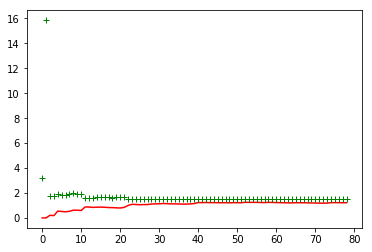

In [7]:
plot_learning_curves(linear_regression, X, y)